### 1) Problem Statement is to build a predictive model and find out the sales of each product at a particular store.

### 2) Hypothesis Generation: 
#### The sales performance of Bigmart stores located in highly populated areas with a high percentage of middle-income families is expected to be better than those located in less populated areas with a low percentage of middle-income families.

### 3) Loading Packages and Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import datetime
from random import sample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
import scipy.stats as stats
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [7]:
# Loading the test dataset from a CSV file
test = pd.read_csv('Test.csv')

# Loading the train dataset from a CSV file
train = pd.read_csv('Train.csv')

In [8]:
#view the head of test dataset
test.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
#view the head of train dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#check the shape of both test and train datasets
train.shape, test.shape

((8523, 12), (5681, 11))

In [12]:
#View the columns in both dataset
test.columns, train.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'))

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [17]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
# Fill null values in 'Item_Weight' column with the median value of the column of train dataset
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)

# Fill null values in 'Outlet_Size' column with the mode value of the column of train dataset
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [20]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
# Fill null values in 'Item_Weight' column with the median value of the column of test dataset
test['Item_Weight'].fillna(test['Item_Weight'].median(), inplace=True)

# Fill null values in 'Outlet_Size' column with the mode value of the column of test dataset
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [24]:
## We see there are some irregularities in the column and it is needed to fix them

In [25]:
train['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'], inplace=True)
test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],['Low Fat', 'Low Fat', 'Regular'], inplace=True)
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Visibility'>

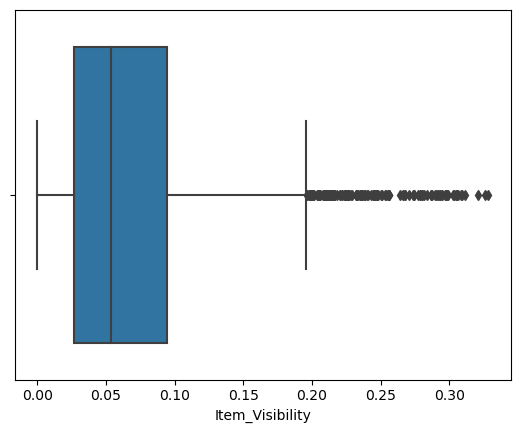

In [27]:
sns.boxplot(data=train, x='Item_Visibility')

In [28]:
from scipy.stats.mstats import winsorize

# Winsorize 'Item_Visibility' column to remove outliers
train['Item_Visibility'] = winsorize(train['Item_Visibility'], limits=(0.05, 0.05))

<AxesSubplot:xlabel='Item_Visibility'>

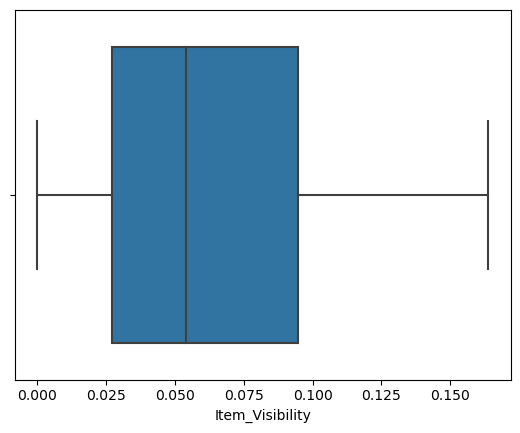

In [29]:
sns.boxplot(data=train, x='Item_Visibility')

In [30]:
train.shape, test.shape

((8523, 12), (5681, 11))

## Exploratory Data Analysis

In [31]:
# Select all columns in "train" that have a data type of "object"
categorical = train.select_dtypes(include =[object])

# Print the number of categorical features and their names
print(categorical.shape[1], "Categorical Features in Train Set are:")
print('\t' + '\n\t'.join(categorical.columns) + "\n")

7 Categorical Features in Train Set are:
	Item_Identifier
	Item_Fat_Content
	Item_Type
	Outlet_Identifier
	Outlet_Size
	Outlet_Location_Type
	Outlet_Type



<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

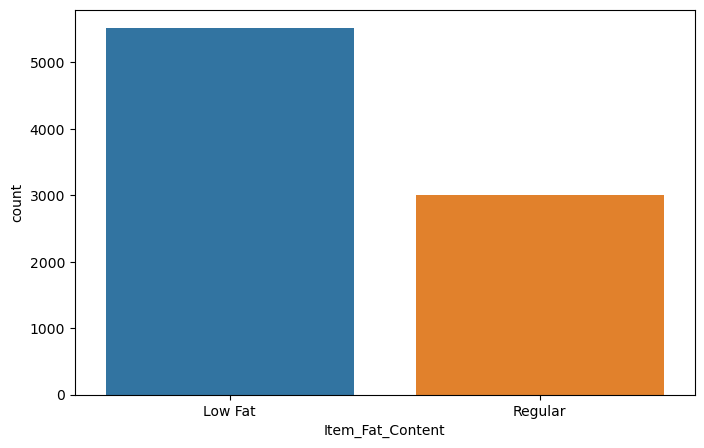

In [32]:
# Categorical Analysis
# 1. Item Fat content
plt.figure(figsize=(8,5))
sns.countplot(data=train, x='Item_Fat_Content')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

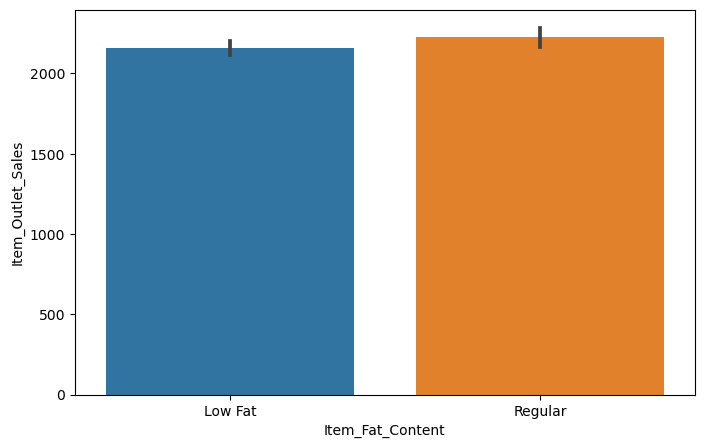

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(data=train, x='Item_Fat_Content', y='Item_Outlet_Sales')

## Observations:
#### The Items bought are more of Low Fat.
#### But Item Outles sales are almost same for both Low Fat and Regular Item Content

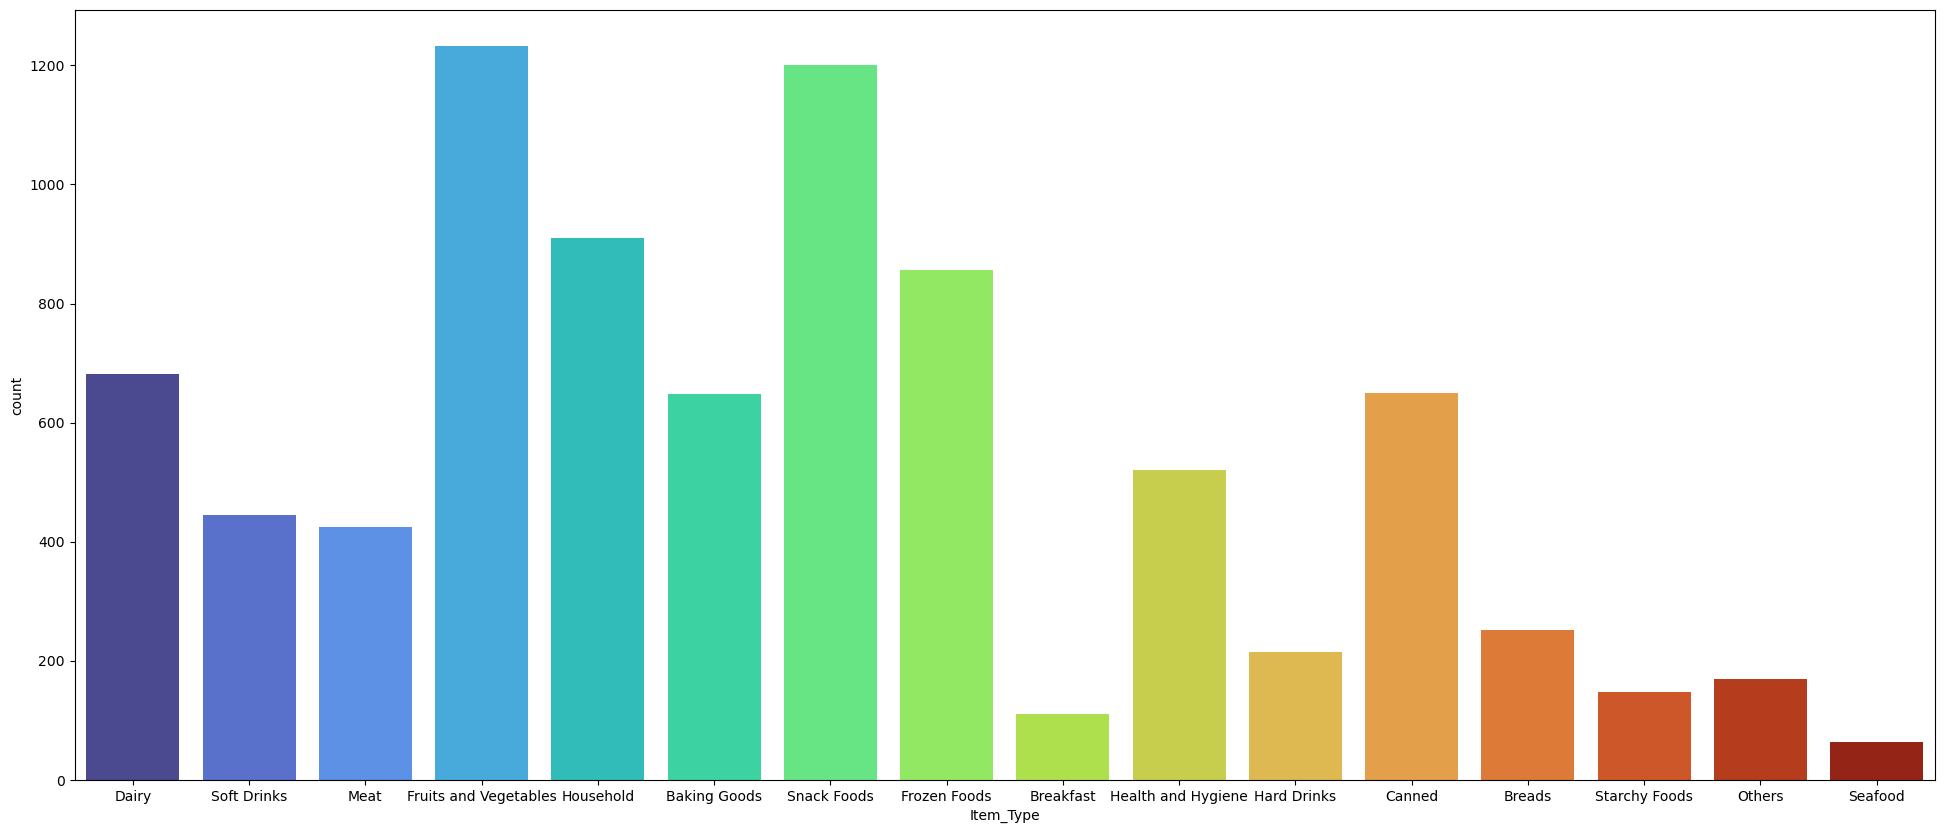

In [34]:
# 2. Item type
# Set the figure size to 20x8
plt.figure(figsize=(24,10))

# Create a count plot using Seaborn, and rotate the x-axis labels by 35 degrees
sns.countplot(data=train, x='Item_Type', palette='turbo', orient="h")

# Display the plot using Matplotlib
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

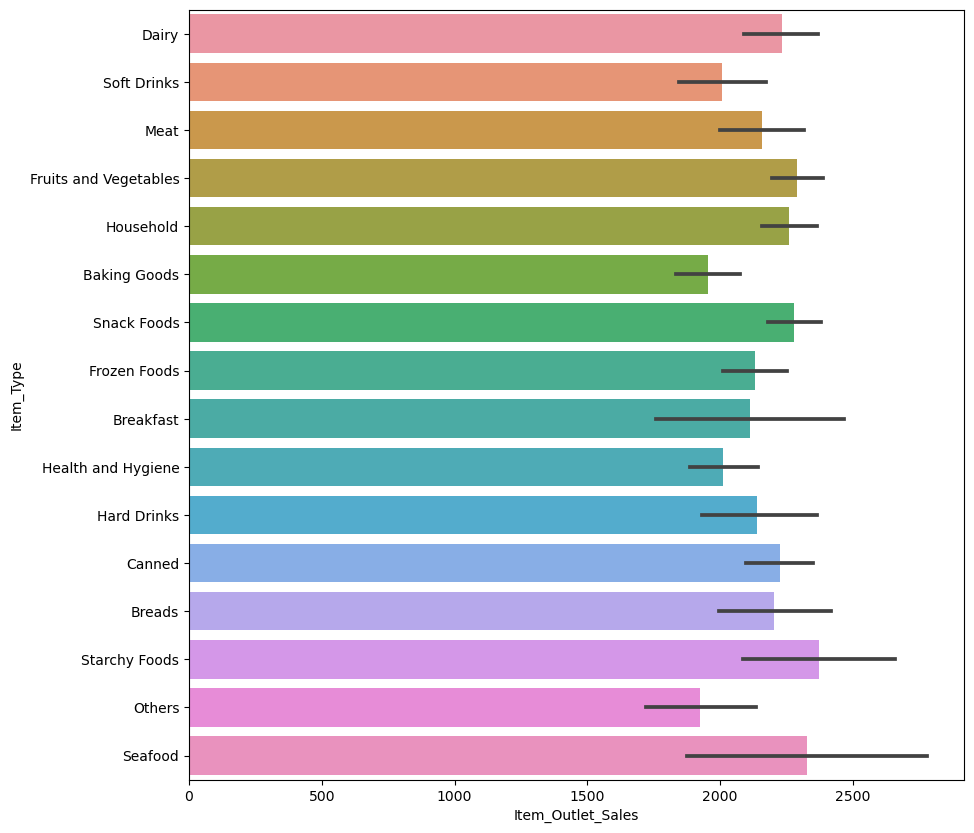

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(data=train, y='Item_Type', x='Item_Outlet_Sales')

Observations :
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

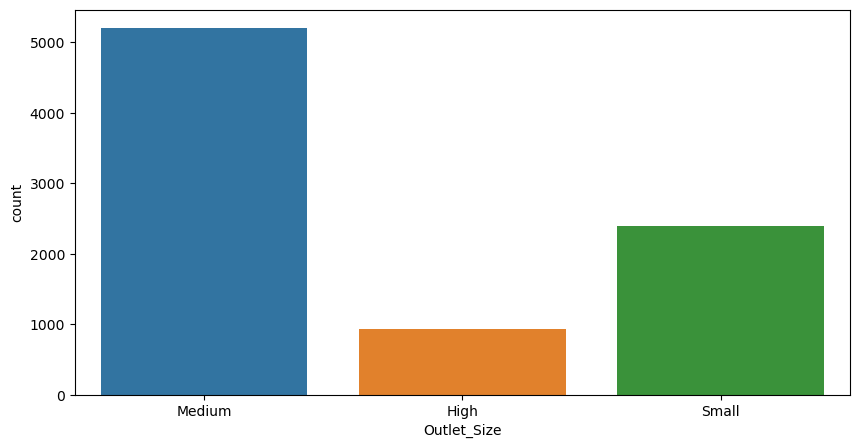

In [36]:
# 3.Outlet_Size
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

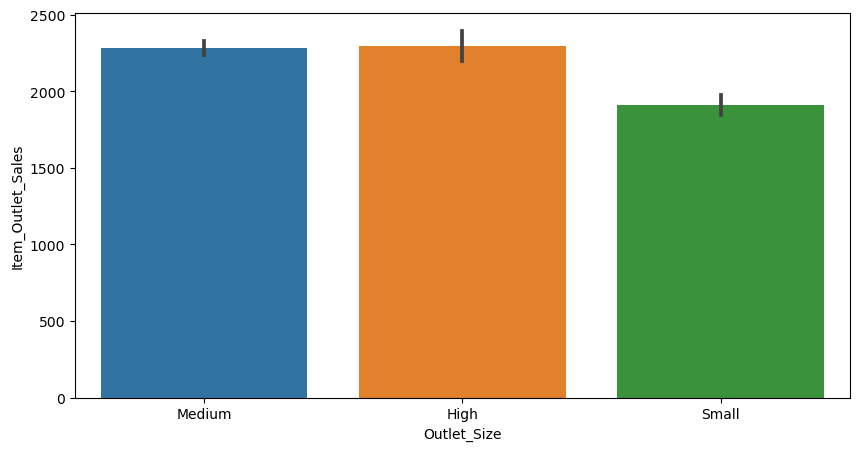

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales')

Observations:
The Outlets are more of Medium Size But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

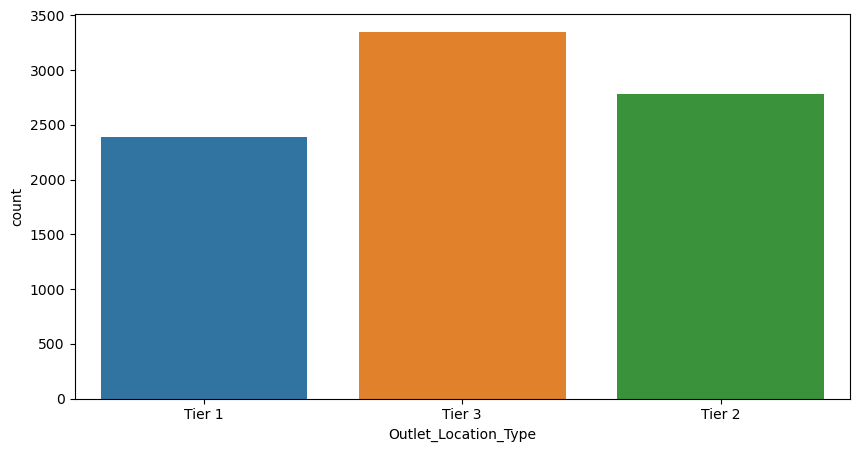

In [38]:
# 4. Outlet_Location_Type
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

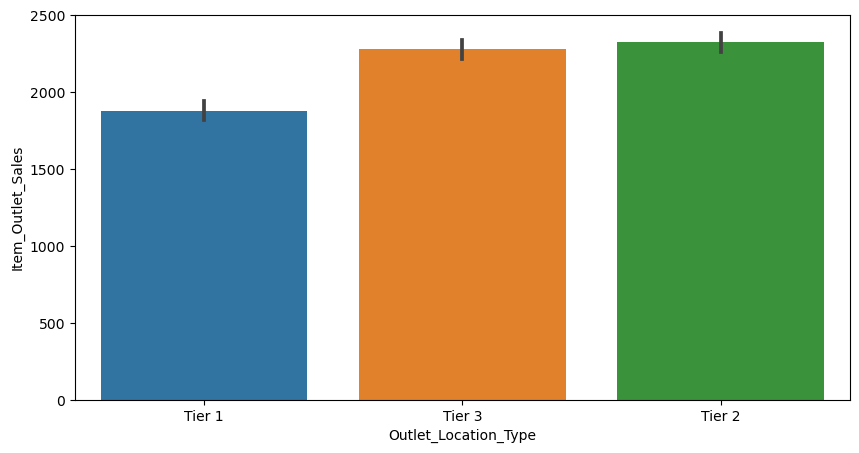

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales')

Observations:
The Outlet Sales tend to be high for Tier3 and Tier 2 location types But we have only Tier3 locations maximum Outlets

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

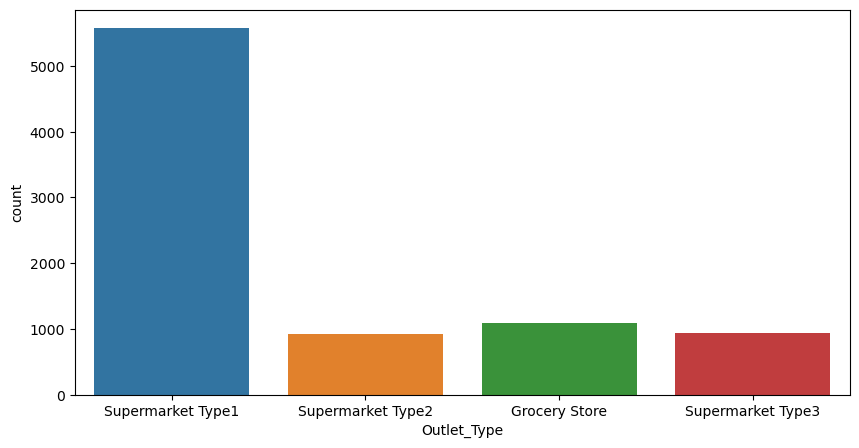

In [40]:
# 5. Outlet_type
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

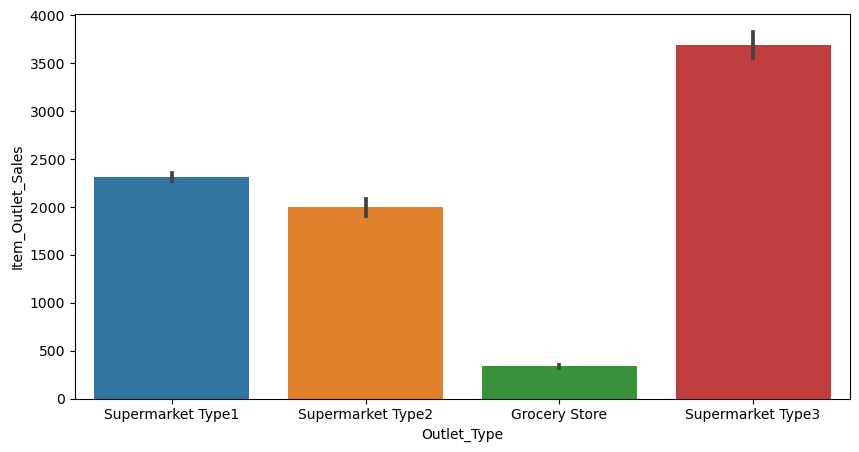

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales')

Observations:
The Outlets are more of Supermarket Type1. But sales are more on Type 3

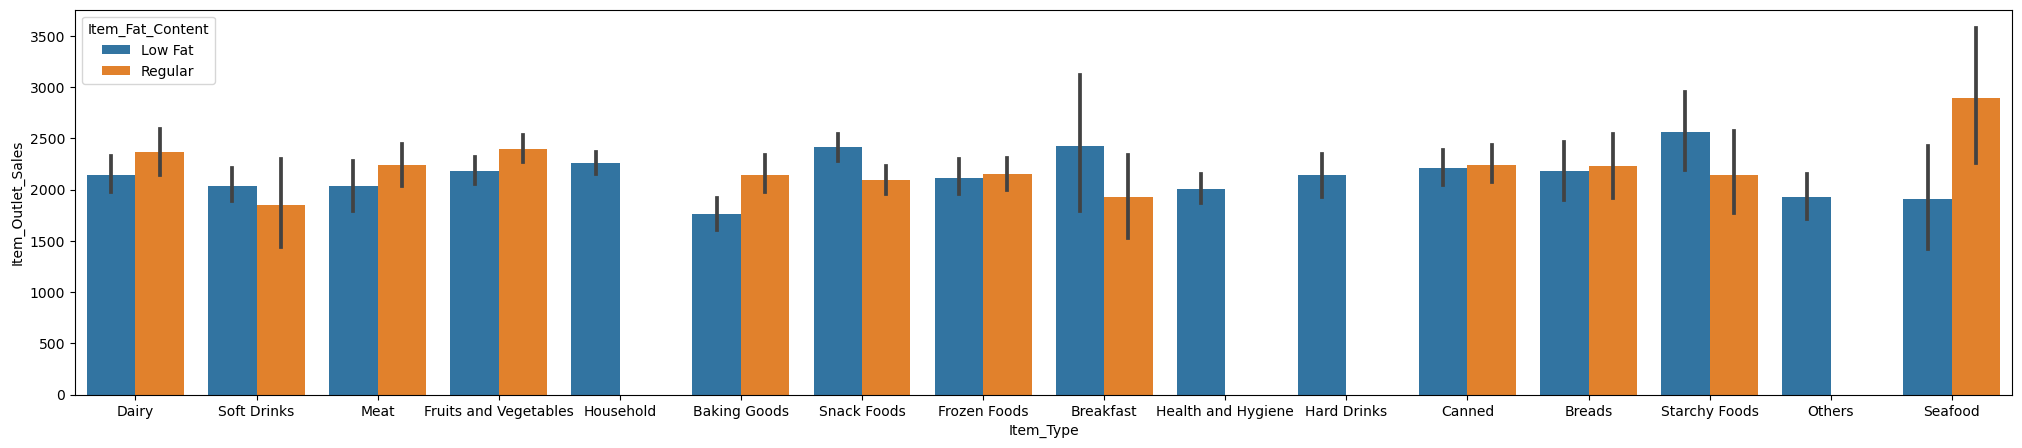

In [42]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train)
plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

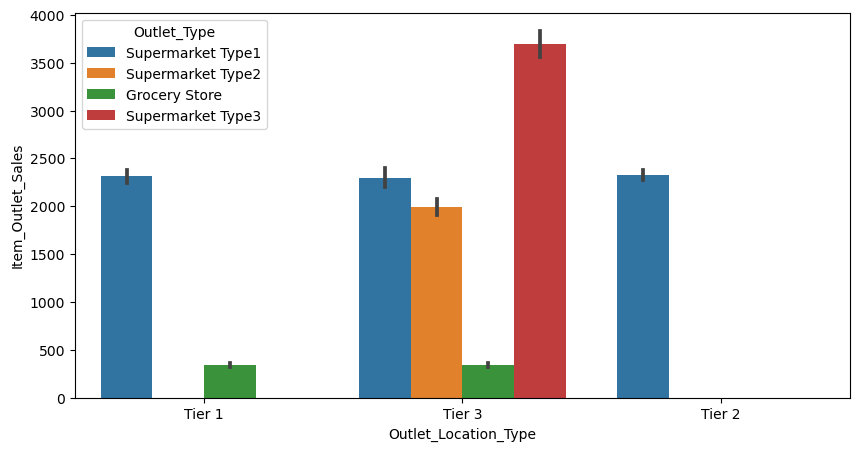

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=train)

Observations:
The Tier-3 location type has all types of Outlet type and has high sales margin

In [44]:
# Analysis on Numerical Features
# Selecting only numerical columns
num_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Printing the numerical column names
print("Numerical features: ")
for col in num_cols:
    print(col)

Numerical features: 
Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


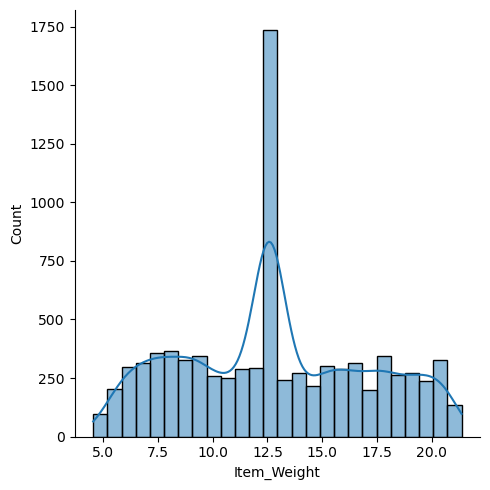

In [45]:
# Item weight
sns.displot(data=train, x=train.Item_Weight, kde=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

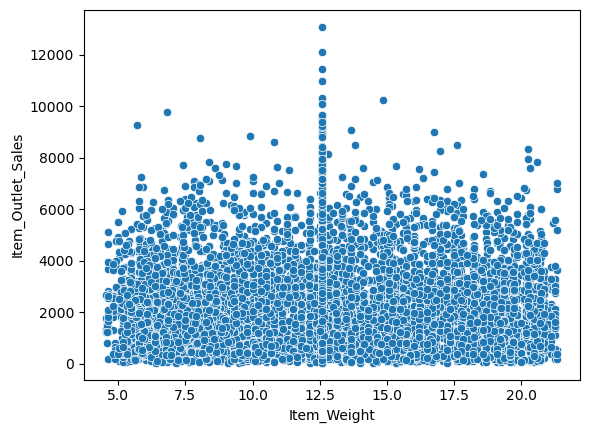

In [46]:
sns.scatterplot(data=train, x='Item_Weight', y='Item_Outlet_Sales')

Observations:
We have more products of weight around 12.5, and sell is maximum for that weight

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

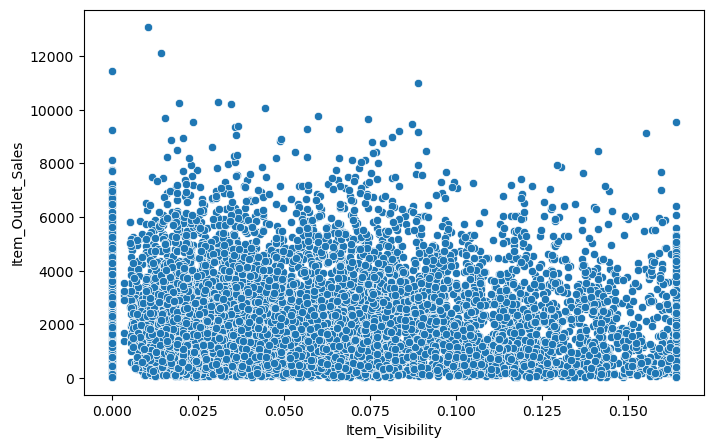

In [48]:
#Item Visibility
plt.figure(figsize=(8,5))
sns.scatterplot(data=train, x='Item_Visibility',y='Item_Outlet_Sales')

In [49]:
train.Item_Visibility.min()

0.0

## Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

In [50]:
train['Item_Visibility'].mean()

0.06435454226011966

In [51]:
train['Item_Visibility'].median()

0.053930934

In [52]:
train['Item_Visibility'].mode()

0    0.0
Name: Item_Visibility, dtype: float64

### Lets consider it like missing information and impute it with median (as their are outlier) visibility of that product

In [53]:
train.Item_Visibility.min()

0.0

### We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers

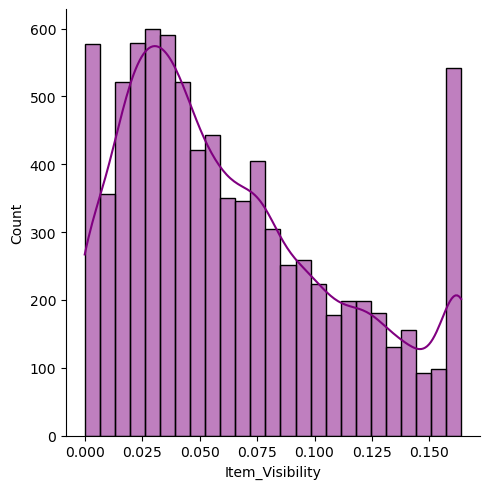

In [54]:
sns.displot(x=train.Item_Visibility, color='purple', kde=True)

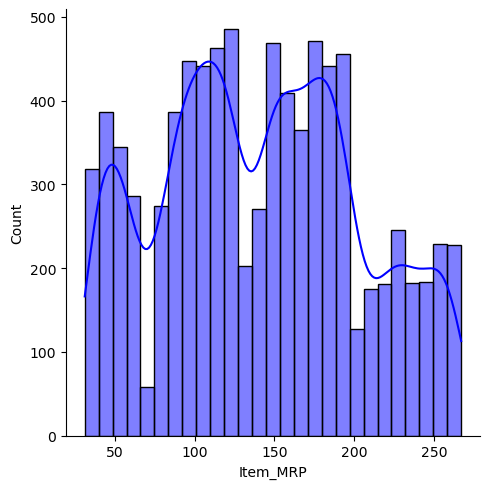

In [55]:
# 3. Item MRP
sns.displot(x=train.Item_MRP, color='blue', kde=True)
plt.show()

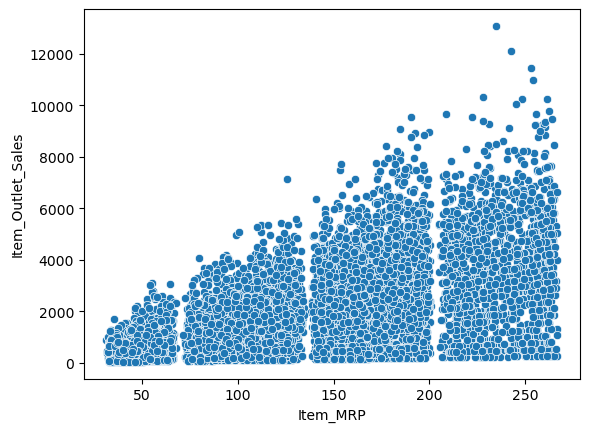

In [56]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

In [58]:
#  Outlet_Establishment_Year
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2023 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)
# This code creates two new columns in the named train and test called 'Years_Established'. The values in the new columns are calculated by subtracting the 'Outlet_Establishment_Year' column from the year 2023, which gives the number of years that each outlet has been in operation.

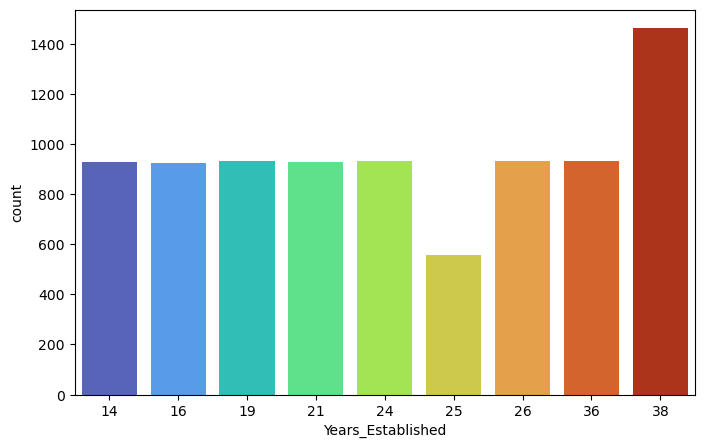

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=train,palette='turbo')
plt.show()

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

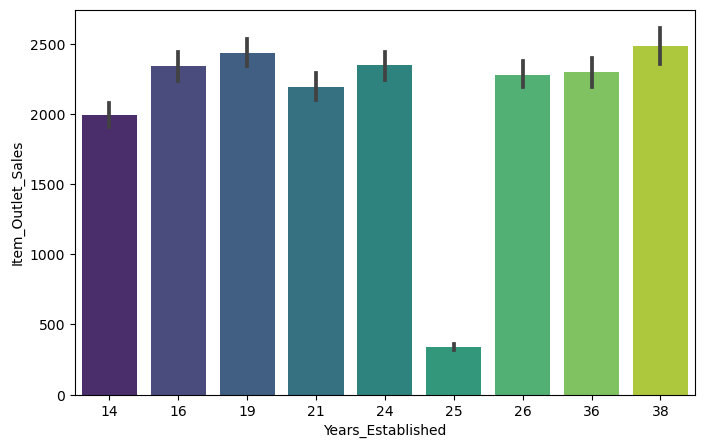

In [60]:

plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

### Observations: It is quiet evident that Outlets established 36 years before is having good Sales margin. We also have a outlet which was established before 23 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

In [61]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


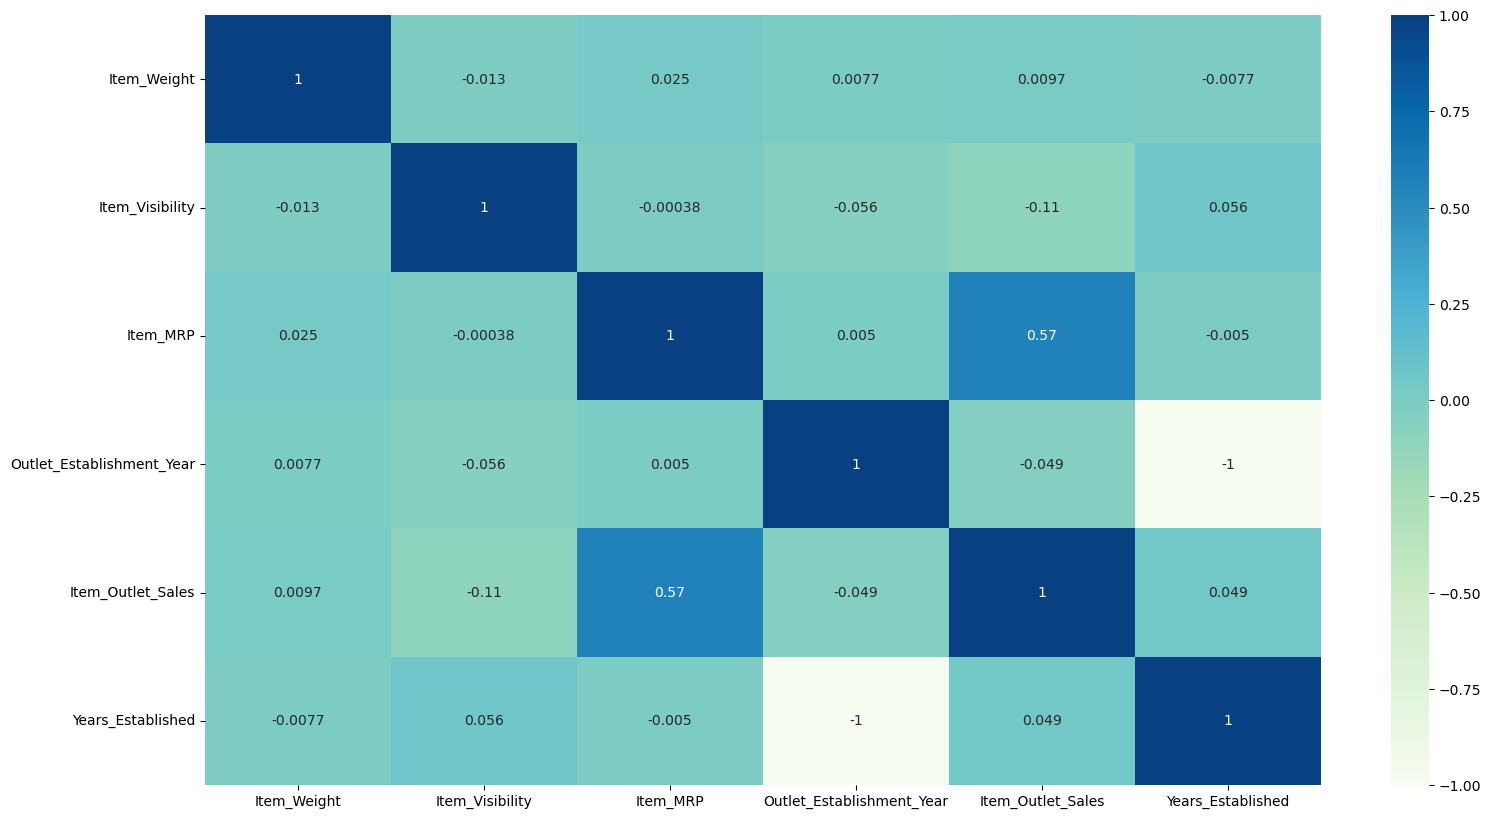

In [62]:
plt.figure(figsize=(18,10))
sns.heatmap(train.corr() ,cmap='GnBu', annot=True)
plt.show()

In [63]:
# Pre-Processing the Dataset
# Remove the skweness
train.Item_Visibility.describe()

count    8523.000000
mean        0.064355
std         0.046609
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.163806
Name: Item_Visibility, dtype: float64

In [64]:
train.Item_Visibility = train.Item_Visibility.apply(np.log1p)

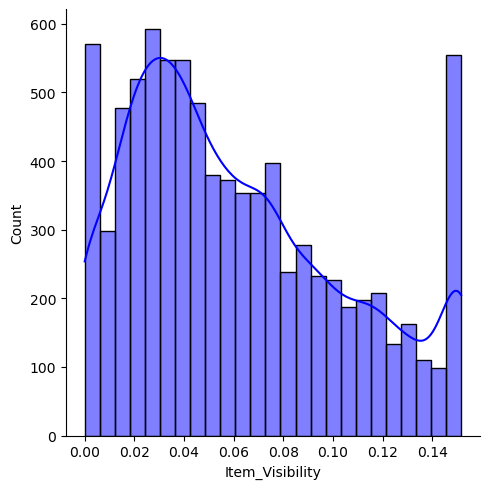

In [65]:
sns.displot(x=train.Item_Visibility, color='blue', kde=True)
plt.show()

In [66]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.061426
std         0.043247
min         0.000000
25%         0.026632
50%         0.052527
75%         0.090376
max         0.151695
Name: Item_Visibility, dtype: float64

### Feature Engineering

In [67]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables in the training dataset
for i in categorical.columns:
    train[i] = le.fit_transform(train[i])
    
# Encode categorical variables in the testing dataset
for i in categorical.columns:
    test[i] = le.fit_transform(test[i])

In [68]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,3735.1380,24
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,443.4228,14
2,662,17.50,0,0.016621,10,141.6180,9,1999,1,0,1,2097.2700,24
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,25
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,36


In [69]:
# Train Test Split
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.3,0,0.01592,4,249.8092,9,1999,1,0,1,3735.138,24


In [70]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,24
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,14


In [71]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(power_t.fit_transform(X), columns=X.columns)
X.head()

C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Swapnil Mukwane\anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-1.461039,-0.808889,-0.738147,-1.149954,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
1,-2.093858,-1.738575,1.354743,-1.042418,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.590639
2,-0.154018,1.094638,-0.738147,-1.125968,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
3,0.773522,1.449766,1.354743,-1.732159,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,0.151483
4,1.098294,-0.905013,-0.738147,-1.732159,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,1.231718


In [72]:
X.skew().sort_values()

Item_Identifier             -0.293700
Outlet_Location_Type        -0.220632
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Item_Type                   -0.164574
Item_MRP                    -0.115386
Item_Weight                 -0.062510
Outlet_Size                 -0.042980
Outlet_Type                  0.007863
Years_Established            0.009409
Item_Visibility              0.099207
Item_Fat_Content             0.616705
dtype: float64

In [73]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-1.461039,-0.808889,-0.738147,-1.149954,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
1,-2.093858,-1.738575,1.354743,-1.042418,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.590639
2,-0.154018,1.094638,-0.738147,-1.125968,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.029627
3,0.773522,1.449766,1.354743,-1.732159,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,0.151483
4,1.098294,-0.905013,-0.738147,-1.732159,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,1.231718


In [74]:
# Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=12, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-1.336983,0.549023,-0.976924,0.496014,0.917179,-1.066902,1.105067,1.048732,-1.693592,1.170798,-0.020638,0.004485
1,0.268158,-2.756033,-0.493294,1.546718,3.017639,0.696573,-0.445941,0.560417,1.376028,-0.393180,0.027582,0.046116
2,-1.294551,0.568068,-1.436969,-0.911221,0.023643,-0.265999,-0.837714,0.639985,-0.249079,1.183099,-0.028318,0.004263
3,1.377065,-0.377001,1.161105,-0.669265,-1.449898,-0.907128,-0.689374,2.793897,0.791328,-0.642745,-0.469280,-0.031941
4,2.962545,0.582306,-0.853552,-0.663064,0.094108,2.165570,0.428790,1.435492,0.625838,0.441772,0.042010,0.001406


In [75]:
# Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X)

,variables,VIF FACTOR
0,Item_Identifier,1.0
1,Item_Weight,1.0
2,Item_Fat_Content,1.0
3,Item_Visibility,1.0
4,Item_Type,1.0
5,Item_MRP,1.0
6,Outlet_Identifier,1.0
7,Outlet_Establishment_Year,1.0
8,Outlet_Size,1.0
9,Outlet_Location_Type,1.0


In [76]:
# Finding Best Random State For Regression Models
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

max_Accu=0
max_RS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.5822624660492826 on Random State 247


,Importance
Features,
Item_MRP,0.312
Item_Fat_Content,0.184
Outlet_Identifier,0.134
Item_Identifier,0.054
Outlet_Location_Type,0.054
Years_Established,0.045
Item_Type,0.043
Outlet_Size,0.043
Item_Weight,0.036


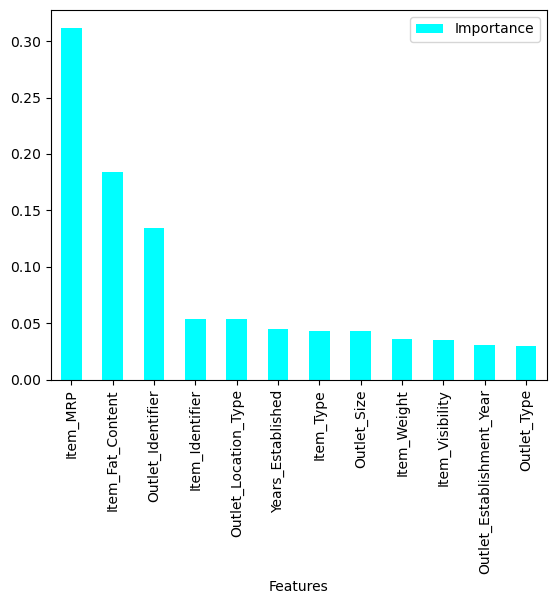

In [78]:
# Feature Importance
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

In [79]:
X.shape, y.shape

((8523, 12), (8523,))

In [80]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((6818, 12), (1705, 12), (1705,), (6818,))

In [81]:
import statsmodels.api as sm

In [82]:
import statsmodels.api as sm

# Create a linear regression model and fit it to the data
Lr_model = sm.OLS(y_train, X_train)
results = Lr_model.fit()

# Print the regression coefficients and other statistics
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.204
Model:                            OLS   Adj. R-squared (uncentered):              0.202
Method:                 Least Squares   F-statistic:                              145.2
Date:                Fri, 07 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:35:41   Log-Likelihood:                         -62918.
No. Observations:                6818   AIC:                                  1.259e+05
Df Residuals:                    6806   BIC:                                  1.259e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [83]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# create a Lasso model and fit it to the training data
lasso_model = Lasso(alpha=0.1) # set the regularization strength
lasso_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = lasso_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model coefficients and other statistics
print("Lasso Regression Report\n")
print("Model coefficients:")
print(lasso_model.coef_)
print("\nModel intercept:")
print(lasso_model.intercept_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Lasso Regression Report

Model coefficients:
[   72.70148462   -39.17419727  -569.48572649   124.88524772
  -158.18460129  -848.94856934   471.72213399  -234.56627865
  -151.48389519    67.2158698    386.25701304 -8354.43288414]

Model intercept:
2180.733494226043

Model performance:
Mean squared error: 1373365.69
R-squared: 0.55


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create a Random Forest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model feature importances and other statistics
print("Random Forest Regression Report\n")
print("Feature importances:")
print(rf_model.feature_importances_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Random Forest Regression Report

Feature importances:
[0.05280406 0.03554166 0.18706197 0.03596581 0.04275622 0.3099147
 0.13362213 0.03177452 0.04267971 0.05336564 0.02946506 0.04504851]

Model performance:
Mean squared error: 1378686.16
R-squared: 0.54


In [85]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate metrics
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

XGBoost Regression Report

Mean squared error: 1391651.80
R-squared: 0.54


In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Create and fit the XGBoost model with hyperparameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100, learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate metrics
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

XGBoost Regression Report

Mean squared error: 1277254.91
R-squared: 0.58


In [87]:
# Add some hyperparameters to increase the model performance
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Create the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)

# Define the hyperparameters to search
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 7],
          'min_child_weight': [1, 3, 5]}

# Create the grid search object
grid_search = GridSearchCV(xgb_model, params, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set and calculate metrics
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Best parameters: {grid_search.best_params_}")

XGBoost Regression Report

Mean squared error: 1269873.88
R-squared: 0.58
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


In [88]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=100, ...)